# 문제1 covid-19 dataset

## source location: https://ourworldindata.org/covid-vaccinations
## 선택국가명: 한국, 미국, UK,  독일, 일본

In [31]:
import pandas as pd 

In [32]:
covid_data = pd.read_csv(
    "./data/covid19data.csv",
    encoding="utf-8")


covid_data.tail()

,location,date,total_cases,total_deaths
3130,United States,10/7/2021,44158910.0,710502.0
3131,United States,10/8/2021,44290052.0,712339.0
3132,United States,10/9/2021,44317553.0,712618.0
3133,United States,10/10/2021,44339747.0,712873.0
3134,United States,10/11/2021,44455949.0,714055.0


# 문제 2 전체 데이터 

In [33]:
covid_data

,location,date,total_cases,total_deaths
0,Germany,1/6/2020,NaN,NaN
1,Germany,1/18/2020,NaN,NaN
2,Germany,1/26/2020,NaN,NaN
3,Germany,1/27/2020,1.0,NaN
4,Germany,1/28/2020,4.0,NaN
...,...,...,...,...
3130,United States,10/7/2021,44158910.0,710502.0
3131,United States,10/8/2021,44290052.0,712339.0
3132,United States,10/9/2021,44317553.0,712618.0
3133,United States,10/10/2021,44339747.0,712873.0


# 문제 3 시간대별 확진자수, 사망자수 시각화

In [34]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      3135 non-null   object 
 1   date          3135 non-null   object 
 2   total_cases   3131 non-null   float64
 3   total_deaths  2965 non-null   float64
dtypes: float64(2), object(2)
memory usage: 98.1+ KB


In [35]:
covid_data['date'] = covid_data['date'].astype('datetime64[ns]')







In [36]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   location      3135 non-null   object        
 1   date          3135 non-null   datetime64[ns]
 2   total_cases   3131 non-null   float64       
 3   total_deaths  2965 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 98.1+ KB


In [37]:
covid = covid_data.copy()
covid.head()

,location,date,total_cases,total_deaths
0,Germany,2020-01-06,NaN,NaN
1,Germany,2020-01-18,NaN,NaN
2,Germany,2020-01-26,NaN,NaN
3,Germany,2020-01-27,1.0,NaN
4,Germany,2020-01-28,4.0,NaN


In [38]:
covid = covid.dropna()
covid

,location,date,total_cases,total_deaths
45,Germany,2020-03-09,1176.0,2.0
46,Germany,2020-03-10,1457.0,2.0
47,Germany,2020-03-11,1908.0,3.0
48,Germany,2020-03-12,2078.0,3.0
49,Germany,2020-03-13,3675.0,7.0
...,...,...,...,...
3130,United States,2021-10-07,44158910.0,710502.0
3131,United States,2021-10-08,44290052.0,712339.0
3132,United States,2021-10-09,44317553.0,712618.0
3133,United States,2021-10-10,44339747.0,712873.0


In [65]:
covid['location'].unique()

array(['Germany', 'Japan', 'South Korea', 'United Kingdom',
       'United States'], dtype=object)

In [68]:
covid_Germany = covid.loc[covid['location'] == 'Germany']
covid_Japan = covid.loc[covid['location'] == 'Japan']
covid_Korea = covid.loc[covid['location'] == 'South Korea']
covid_uk = covid.loc[covid['location'] == 'United Kingdom']
covid_usa = covid.loc[covid['location'] == 'United States']



#covid_Germany.tail()
# covid_Japan.tail()
#covid_Korea.tail()
# covid_uk.tail()
covid_usa.tail()

,location,date,total_cases,total_deaths
3130,United States,2021-10-07,44158910.0,710502.0
3131,United States,2021-10-08,44290052.0,712339.0
3132,United States,2021-10-09,44317553.0,712618.0
3133,United States,2021-10-10,44339747.0,712873.0
3134,United States,2021-10-11,44455949.0,714055.0


In [16]:
import platform
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!!!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows!!!")
    rc("font", family=font_name)
else:
    print("Unknown system.. sorry~~~")
    
plt.rcParams["axes.unicode_minus"] = False 

Hangul OK in your Windows!!!


## 1) 확진자 수 시각화

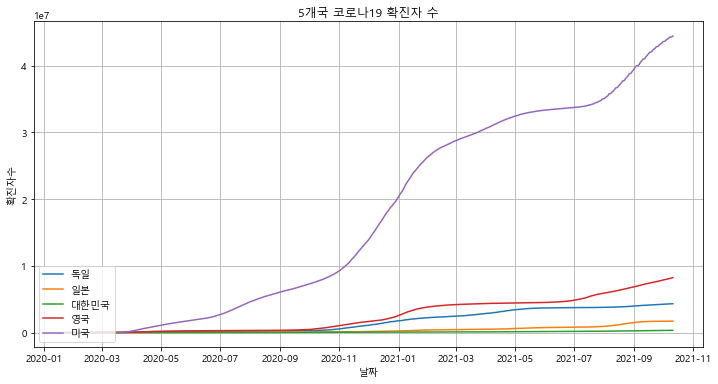

In [90]:
plt.figure(figsize=(12, 6))
plt.plot(covid_Germany['date'], covid_Germany['total_cases'], label="독일")
plt.plot(covid_Japan['date'], covid_Japan['total_cases'], label="일본")
plt.plot(covid_Korea['date'], covid_Korea['total_cases'], label="대한민국")
plt.plot(covid_uk['date'], covid_uk['total_cases'], label="영국")
plt.plot(covid_usa['date'], covid_usa['total_cases'], label="미국")

plt.grid(True)
plt.legend(loc=3) # 범례 
plt.title("5개국 코로나19 확진자 수")
plt.xlabel("날짜")
plt.ylabel("확진자수") 
plt.show()

## 2) 사망자 수 시각화

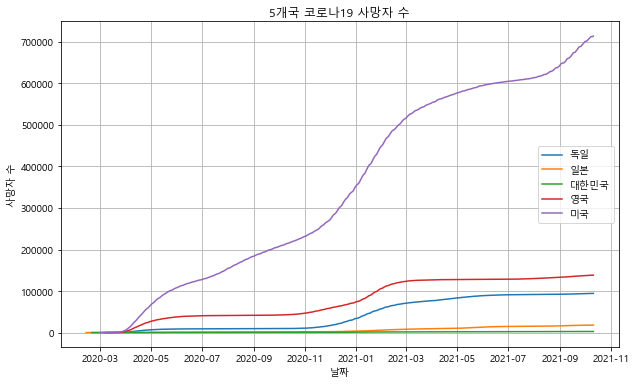

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(covid_Germany['date'], covid_Germany['total_deaths'], label="독일")
plt.plot(covid_Japan['date'], covid_Japan['total_deaths'], label="일본")
plt.plot(covid_Korea['date'], covid_Korea['total_deaths'], label="대한민국")
plt.plot(covid_uk['date'], covid_uk['total_deaths'], label="영국")
plt.plot(covid_usa['date'], covid_usa['total_deaths'], label="미국")

plt.grid(True)
plt.legend(loc=5) # 범례 
plt.title("5개국 코로나19 사망자 수")
plt.xlabel("날짜")
plt.ylabel("사망자 수") 
plt.show()

# 문제4 인구수 비율


### 대한민국 인구수: 51,317,649
### 독일 인구수:  83,703,925
### 일본 인구수:  126,401,064
### 영국 인구수: 68,469,013
### 미국 인구수: 334,483,145


In [77]:
# 인구대비 확진자 비율

covid_Germany["case_pop_rate"] = (covid_Germany["total_cases"] /  83703925 * 100)
covid_Japan["case_pop_rate"] = (covid_Japan["total_cases"] /  126401064 * 100)
covid_Korea["case_pop_rate"] = (covid_Korea["total_cases"] /  51317649 * 100)
covid_uk["case_pop_rate"] = (covid_uk["total_cases"] /  68469013 * 100)
covid_usa["case_pop_rate"] = (covid_usa["total_cases"] /  334483145 * 100)

C:\Users\gigic\AppData\Local\Temp/ipykernel_12664/3514662132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_Germany["case_pop_rate"] = (covid_Germany["total_cases"] /  83703925 * 100)
C:\Users\gigic\AppData\Local\Temp/ipykernel_12664/3514662132.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_Japan["case_pop_rate"] = (covid_Japan["total_cases"] /  126401064 * 100)
C:\Users\gigic\AppData\Local\Temp/ipykernel_12664/3514662132.py:5: SettingWithCopyWarning: 
A value is trying to be set on a 

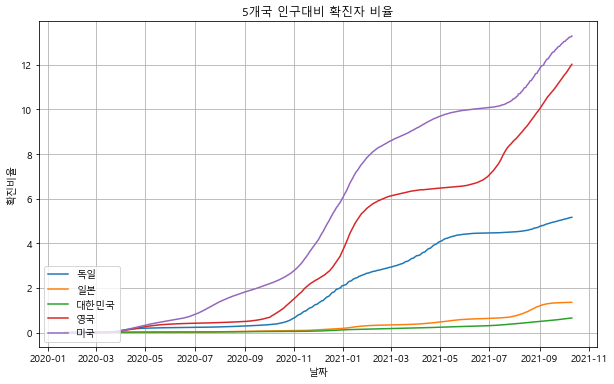

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(covid_Germany['date'], covid_Germany['case_pop_rate'], label="독일")
plt.plot(covid_Japan['date'], covid_Japan['case_pop_rate'], label="일본")
plt.plot(covid_Korea['date'], covid_Korea['case_pop_rate'], label="대한민국")
plt.plot(covid_uk['date'], covid_uk['case_pop_rate'], label="영국")
plt.plot(covid_usa['date'], covid_usa['case_pop_rate'], label="미국")

plt.grid(True)
plt.legend(loc=3) # 범례 
plt.title("5개국 인구대비 확진자 비율")
plt.xlabel("날짜")
plt.ylabel("확진비율") 
plt.show()

In [80]:
# 인구대비 사망자 비율

covid_Germany["death_pop_rate"] = (covid_Germany["total_deaths"] /  83703925 * 100)
covid_Japan["death_pop_rate"] = (covid_Japan["total_deaths"] /  126401064 * 100)
covid_Korea["death_pop_rate"] = (covid_Korea["total_deaths"] /  51317649 * 100)
covid_uk["death_pop_rate"] = (covid_uk["total_deaths"] /  68469013 * 100)
covid_usa["death_pop_rate"] = (covid_usa["total_deaths"] /  334483145 * 100)

C:\Users\gigic\AppData\Local\Temp/ipykernel_12664/1291049687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_Germany["death_pop_rate"] = (covid_Germany["total_deaths"] /  83703925 * 100)
C:\Users\gigic\AppData\Local\Temp/ipykernel_12664/1291049687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_Japan["death_pop_rate"] = (covid_Japan["total_deaths"] /  126401064 * 100)
C:\Users\gigic\AppData\Local\Temp/ipykernel_12664/1291049687.py:5: SettingWithCopyWarning: 
A value is trying to be set o

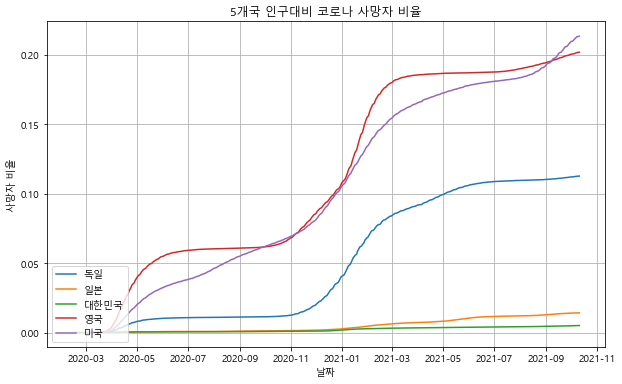

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(covid_Germany['date'], covid_Germany['death_pop_rate'], label="독일")
plt.plot(covid_Japan['date'], covid_Japan['death_pop_rate'], label="일본")
plt.plot(covid_Korea['date'], covid_Korea['death_pop_rate'], label="대한민국")
plt.plot(covid_uk['date'], covid_uk['death_pop_rate'], label="영국")
plt.plot(covid_usa['date'], covid_usa['death_pop_rate'], label="미국")

plt.grid(True)
plt.legend(loc=3) # 범례 
plt.title("5개국 인구대비 코로나 사망자 비율")
plt.xlabel("날짜")
plt.ylabel("사망자 비율") 
plt.show()

# 문제5 전체데이터의 시계열 분석

In [114]:
import pandas as pd 
import pandas_datareader as web 
import numpy as np 
import matplotlib.pyplot as plt 

from prophet import Prophet
from datetime import datetime 

In [115]:
covid_data

,location,date,total_cases,total_deaths
0,Germany,2020-01-06,NaN,NaN
1,Germany,2020-01-18,NaN,NaN
2,Germany,2020-01-26,NaN,NaN
3,Germany,2020-01-27,1.0,NaN
4,Germany,2020-01-28,4.0,NaN
...,...,...,...,...
3130,United States,2021-10-07,44158910.0,710502.0
3131,United States,2021-10-08,44290052.0,712339.0
3132,United States,2021-10-09,44317553.0,712618.0
3133,United States,2021-10-10,44339747.0,712873.0


## 전체데이터 확진자 및 사망자 수 (일별 평균값)

In [144]:
entireData = covid_data.pivot_table(index = "date", aggfunc= np.mean)
entireData.head()

,total_cases,total_deaths
date,,
2020-01-22,1.333333,NaN
2020-01-23,1.333333,NaN
2020-01-24,2.000000,NaN
2020-01-25,2.000000,NaN
2020-01-26,4.000000,NaN


### 5개국 하루 확진자수 평균

In [145]:
avgfive = pd.DataFrame({"ds": entireData.index, "y":  entireData["total_cases"]})
avgfive.reset_index(inplace=True)
del avgfive["date"]
avgfive.head()

,ds,y
0,2020-01-22,1.333333
1,2020-01-23,1.333333
2,2020-01-24,2.000000
3,2020-01-25,2.000000
4,2020-01-26,4.000000


In [127]:
avgfive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      629 non-null    datetime64[ns]
 1   y       629 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.0 KB


In [129]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(avgfive);

In [130]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
654,2021-11-06,1.269899e+07,1.260474e+07,1.281814e+07
655,2021-11-07,1.273303e+07,1.263278e+07,1.286289e+07
656,2021-11-08,1.277243e+07,1.266323e+07,1.290871e+07
657,2021-11-09,1.281330e+07,1.269119e+07,1.296064e+07
658,2021-11-10,1.285663e+07,1.272910e+07,1.300775e+07


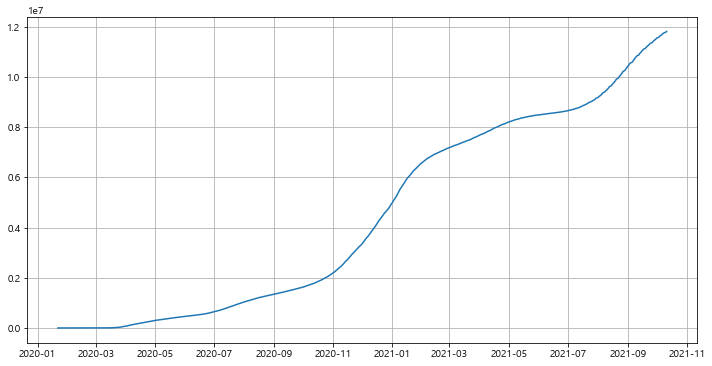

In [150]:
plt.figure(figsize=(12, 6))
plt.plot(avgfive["ds"], avgfive["y"], label="real")
plt.grid(True)
plt.show()

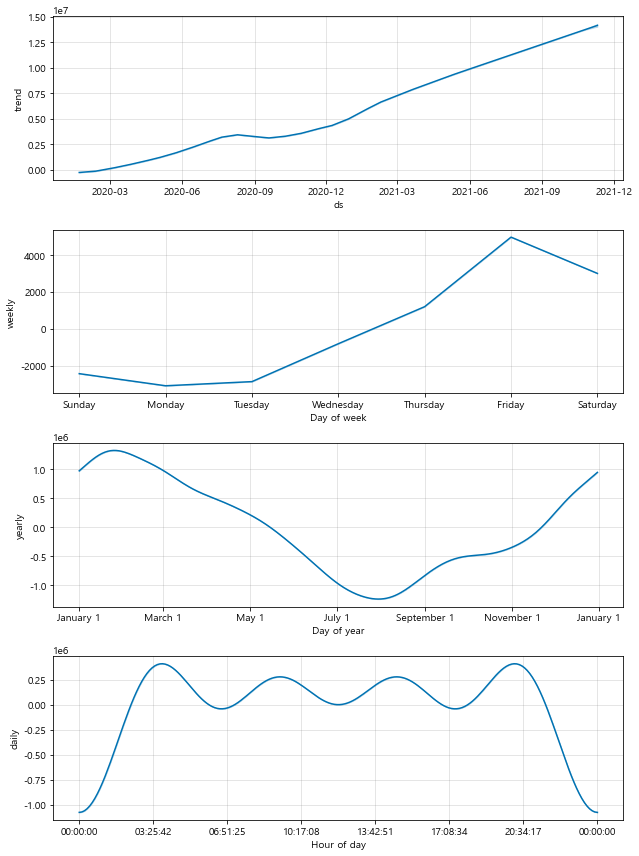

In [132]:
m.plot_components(forecast);

### 5개국 하루 사망자수 (평균) 

In [148]:
avgfive2 = pd.DataFrame({"ds": entireData.index, "y":  entireData["total_deaths"]})
avgfive2.reset_index(inplace=True)
del avgfive2["date"]
avgfive2.tail()

,ds,y
624,2021-10-07,192572.6
625,2021-10-08,192988.8
626,2021-10-09,193089.0
627,2021-10-10,193152.0
628,2021-10-11,193419.2


In [152]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(avgfive2);

In [153]:
future = m.make_future_dataframe(periods=30)
forecast2 = m.predict(future)
forecast2[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
654,2021-11-06,204598.007590,202988.295032,206443.099704
655,2021-11-07,204938.304582,203165.612582,206888.925227
656,2021-11-08,205351.549227,203428.832219,207487.481799
657,2021-11-09,205914.513783,203875.472899,208180.395384
658,2021-11-10,206510.106207,204299.791139,208899.216285


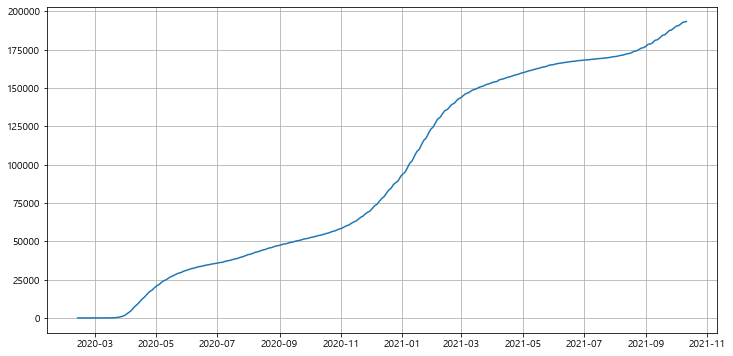

In [154]:
plt.figure(figsize=(12, 6))
plt.plot(avgfive2["ds"], avgfive2["y"], label="real")
plt.grid(True)
plt.show()

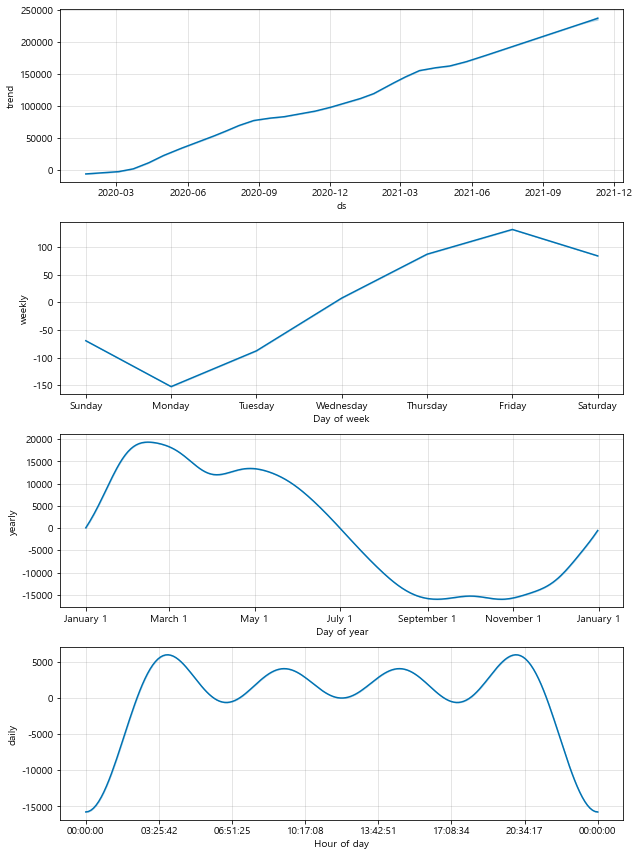

In [155]:
m.plot_components(forecast2);

## 각 나라별 데이터

In [133]:


casedata = covid_data.pivot_table(index = "date", columns = "location", values = "total_cases")
casedata.tail()

location,Germany,Japan,South Korea,United Kingdom,United States
date,,,,,
2021-10-07,4295876.0,1709603.0,327976.0,8084322.0,44158910.0
2021-10-08,4305634.0,1710426.0,329925.0,8119442.0,44290052.0
2021-10-09,4312528.0,1711207.0,331519.0,8158935.0,44317553.0
2021-10-10,4318437.0,1711756.0,332816.0,8192589.0,44339747.0
2021-10-11,4323346.0,1712127.0,334163.0,8232327.0,44455949.0


In [134]:
data = covid_data.pivot_table(index = "date", columns = "location", values = "total_cases")
casedata.tail()

location,Germany,Japan,South Korea,United Kingdom,United States
date,,,,,
2021-10-07,4295876.0,1709603.0,327976.0,8084322.0,44158910.0
2021-10-08,4305634.0,1710426.0,329925.0,8119442.0,44290052.0
2021-10-09,4312528.0,1711207.0,331519.0,8158935.0,44317553.0
2021-10-10,4318437.0,1711756.0,332816.0,8192589.0,44339747.0
2021-10-11,4323346.0,1712127.0,334163.0,8232327.0,44455949.0


In [135]:
casedata.columns

Index(['Germany', 'Japan', 'South Korea', 'United Kingdom', 'United States'], dtype='object', name='location')

In [136]:
col = ["Germany", "Japan", "South Korea", "United Kingdom", "United States"]
casedata.columns = col
casedata

,Germany,Japan,South Korea,United Kingdom,United States
date,,,,,
2020-01-22,NaN,2.0,1.0,NaN,1.0
2020-01-23,NaN,2.0,1.0,NaN,1.0
2020-01-24,NaN,2.0,2.0,NaN,2.0
2020-01-25,NaN,2.0,2.0,NaN,2.0
2020-01-26,NaN,4.0,3.0,NaN,5.0
...,...,...,...,...,...
2021-10-07,4295876.0,1709603.0,327976.0,8084322.0,44158910.0
2021-10-08,4305634.0,1710426.0,329925.0,8119442.0,44290052.0
2021-10-09,4312528.0,1711207.0,331519.0,8158935.0,44317553.0


#### 독일

In [111]:
germany = pd.DataFrame({"ds": casedata.index, "y":  casedata["Germany"]})
germany.reset_index(inplace=True)
del germany["date"]
germany.head()

,ds,y
0,2020-01-22,NaN
1,2020-01-23,NaN
2,2020-01-24,NaN
3,2020-01-25,NaN
4,2020-01-26,NaN


In [116]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(germany);

In [160]:
future = m.make_future_dataframe(periods=90)
forecast_germany = m.predict(future)
forecast_germany[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
714,2022-01-05,487985.010238,460009.410847,516389.469145
715,2022-01-06,489502.091340,460581.715636,518290.715273
716,2022-01-07,490971.242336,461979.550949,520002.722999
717,2022-01-08,492345.530830,462692.198086,521947.032447
718,2022-01-09,493610.548100,463127.491425,523897.085720


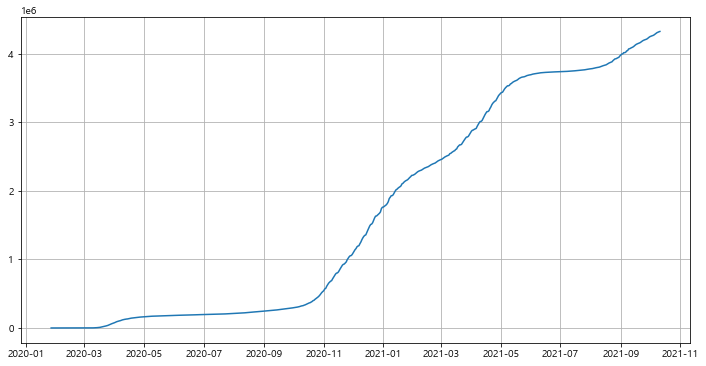

In [161]:
plt.figure(figsize=(12, 6))
plt.plot(germany["ds"], germany["y"], label="real")
plt.grid(True)
plt.show()

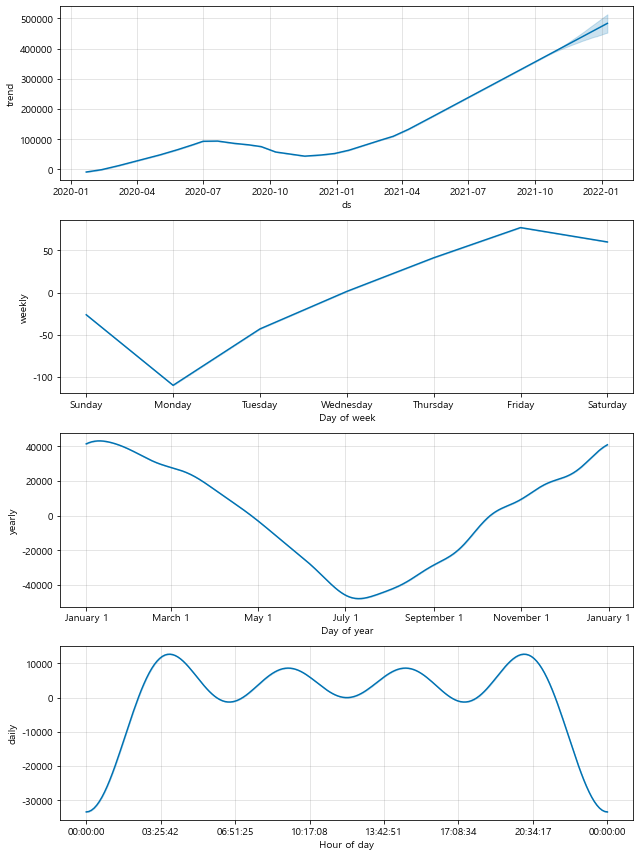

In [162]:
m.plot_components(forecast_germany);

#### 한국

In [163]:
korea = pd.DataFrame({"ds": casedata.index, "y":  casedata["South Korea"]})
korea.reset_index(inplace=True)
del korea["date"]
korea.head()

,ds,y
0,2020-01-22,1.0
1,2020-01-23,1.0
2,2020-01-24,2.0
3,2020-01-25,2.0
4,2020-01-26,3.0


In [164]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(korea);

In [165]:
future = m.make_future_dataframe(periods=90)
forecast_korea = m.predict(future)
forecast_korea[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
714,2022-01-05,487985.010238,460976.273267,512109.305019
715,2022-01-06,489502.091340,462002.624579,513857.198041
716,2022-01-07,490971.242336,462864.141908,515949.758938
717,2022-01-08,492345.530830,463819.957075,517631.003000
718,2022-01-09,493610.548100,464522.488738,519438.956981


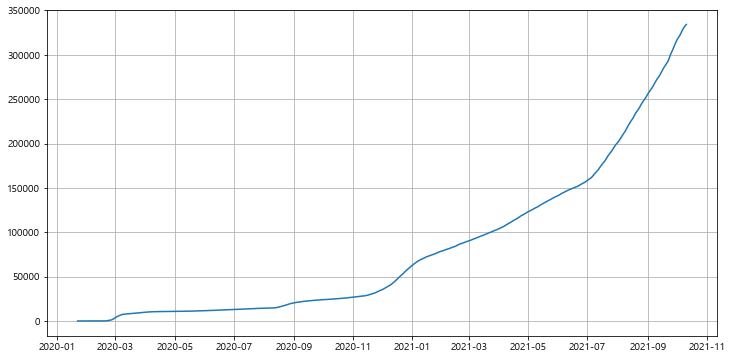

In [166]:
plt.figure(figsize=(12, 6))
plt.plot(korea["ds"], korea["y"], label="real")
plt.grid(True)
plt.show()

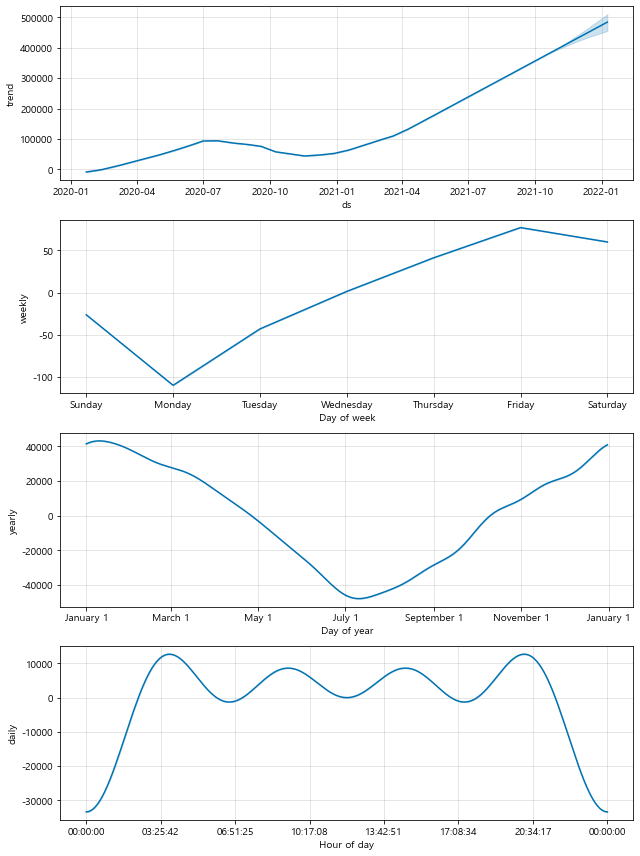

In [168]:
m.plot_components(forecast_korea);

#### 일본

In [169]:
japan = pd.DataFrame({"ds": casedata.index, "y":  casedata["Japan"]})
japan.reset_index(inplace=True)
del japan["date"]
japan.head()

,ds,y
0,2020-01-22,2.0
1,2020-01-23,2.0
2,2020-01-24,2.0
3,2020-01-25,2.0
4,2020-01-26,4.0


In [170]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(japan);

In [171]:
future = m.make_future_dataframe(periods=90)
forecast_japan = m.predict(future)
forecast_japan[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
714,2022-01-05,1.882570e+06,1.615105e+06,2.170143e+06
715,2022-01-06,1.888327e+06,1.613042e+06,2.180096e+06
716,2022-01-07,1.894118e+06,1.613989e+06,2.196326e+06
717,2022-01-08,1.900113e+06,1.615344e+06,2.211642e+06
718,2022-01-09,1.905707e+06,1.615129e+06,2.220469e+06


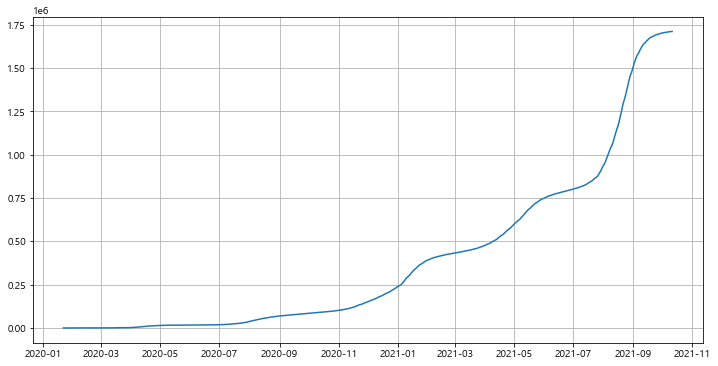

In [172]:
plt.figure(figsize=(12, 6))
plt.plot(japan["ds"], japan["y"], label="real")
plt.grid(True)
plt.show()

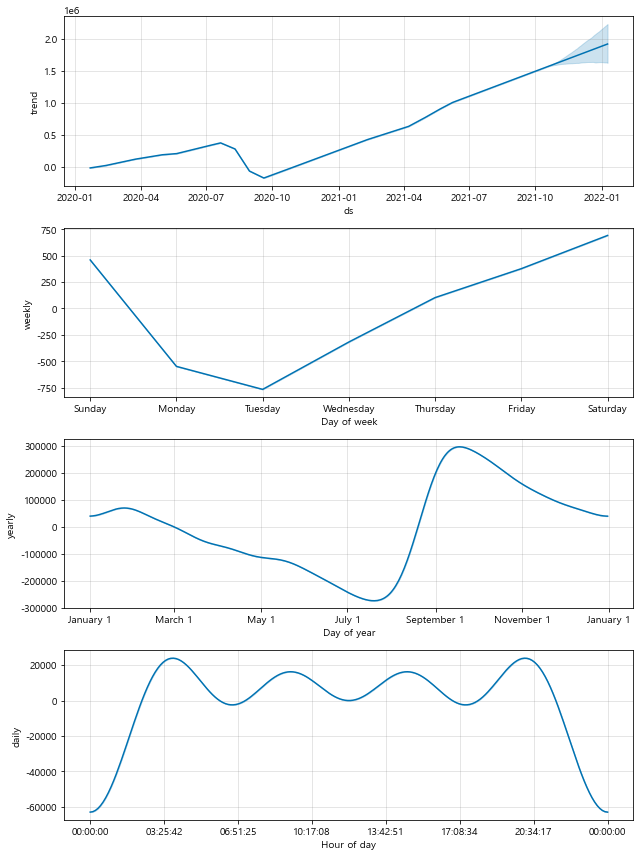

In [173]:
m.plot_components(forecast_japan);

#### 영국

In [174]:
uk = pd.DataFrame({"ds": casedata.index, "y":  casedata["United Kingdom"]})
uk.reset_index(inplace=True)
del uk["date"]
uk.head()

,ds,y
0,2020-01-22,NaN
1,2020-01-23,NaN
2,2020-01-24,NaN
3,2020-01-25,NaN
4,2020-01-26,NaN


In [175]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(uk);

In [177]:
future = m.make_future_dataframe(periods=90)
forecast_uk = m.predict(future)
forecast_uk[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
714,2022-01-05,1.197537e+07,1.132350e+07,1.259700e+07
715,2022-01-06,1.204450e+07,1.137566e+07,1.267375e+07
716,2022-01-07,1.211305e+07,1.143139e+07,1.275508e+07
717,2022-01-08,1.217962e+07,1.148183e+07,1.282431e+07
718,2022-01-09,1.224449e+07,1.153085e+07,1.291165e+07


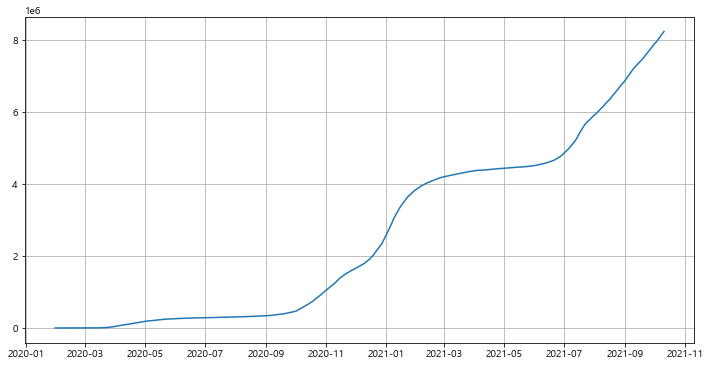

In [178]:
plt.figure(figsize=(12, 6))
plt.plot(uk["ds"], uk["y"], label="real")
plt.grid(True)
plt.show()

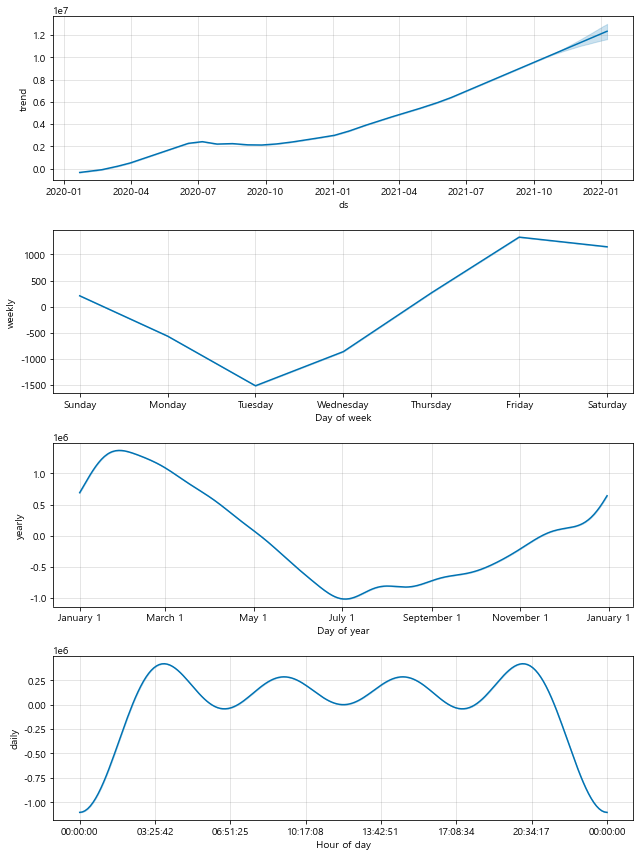

In [179]:
m.plot_components(forecast_uk);

#### 미국

In [180]:
us = pd.DataFrame({"ds": casedata.index, "y":  casedata["United States"]})
us.reset_index(inplace=True)
del us["date"]
us.head()

,ds,y
0,2020-01-22,1.0
1,2020-01-23,1.0
2,2020-01-24,2.0
3,2020-01-25,2.0
4,2020-01-26,5.0


In [181]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(us);

In [182]:
future = m.make_future_dataframe(periods=90)
forecast_us = m.predict(future)
forecast_us[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
714,2022-01-05,5.834245e+07,5.486812e+07,6.174687e+07
715,2022-01-06,5.850259e+07,5.497585e+07,6.196813e+07
716,2022-01-07,5.867340e+07,5.507251e+07,6.221523e+07
717,2022-01-08,5.881669e+07,5.514537e+07,6.244293e+07
718,2022-01-09,5.894573e+07,5.523262e+07,6.262035e+07


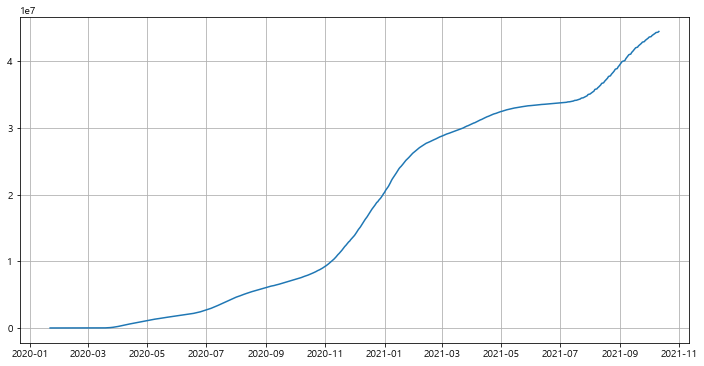

In [183]:
plt.figure(figsize=(12, 6))
plt.plot(us["ds"], us["y"], label="real")
plt.grid(True)
plt.show()

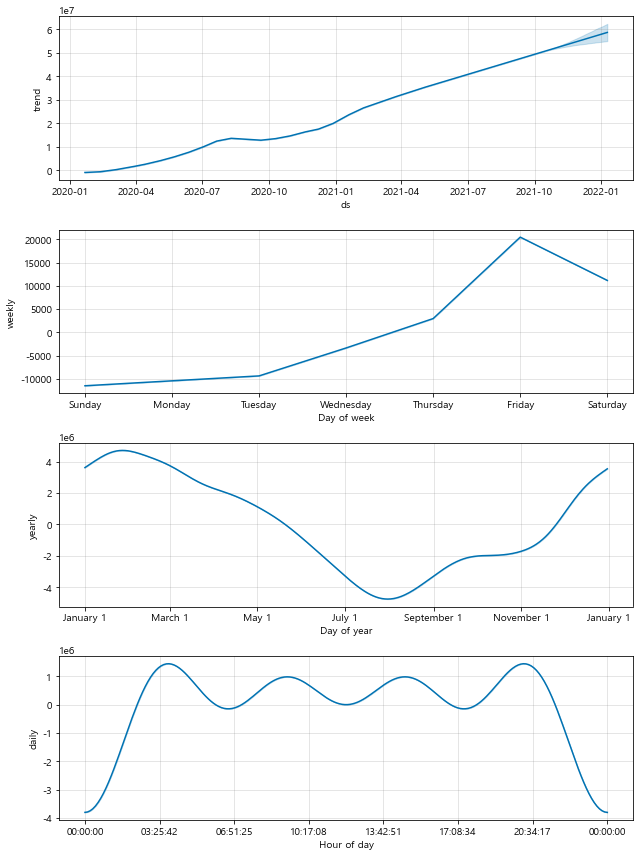

In [184]:
m.plot_components(forecast_us);

In [2]:
import pandas as pd

# 문제6 우리나라 방역 수준

In [49]:
# 백신 접종 데이터 사용
# 맨 위의 상단부터 사용한 코로나 데이터의 원본데이터 포함된 데이터입니다.

covid_vacc = pd.read_csv(
    "./data/vaccination.csv",
    encoding="utf-8")


covid_vacc.tail()


,location,date,total_cases,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated
3130,United States,2021-10-07,44158910.0,710502.0,399552444.0,216268034.0,186618184.0
3131,United States,2021-10-08,44290052.0,712339.0,400669422.0,216573911.0,186917921.0
3132,United States,2021-10-09,44317553.0,712618.0,401819240.0,216889814.0,187215471.0
3133,United States,2021-10-10,44339747.0,712873.0,NaN,NaN,NaN
3134,United States,2021-10-11,44455949.0,714055.0,NaN,NaN,NaN


In [50]:
covid_vacc = covid_vacc.dropna()
covid_vacc

,location,date,total_cases,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated
338,Germany,2020-12-27,1658639.0,30297.0,24353.0,24342.0,11.0
339,Germany,2020-12-28,1672643.0,31145.0,42456.0,42380.0,76.0
340,Germany,2020-12-29,1692109.0,32267.0,93062.0,92332.0,729.0
341,Germany,2020-12-30,1741153.0,33230.0,157063.0,156301.0,761.0
342,Germany,2020-12-31,1760520.0,33791.0,207058.0,206209.0,848.0
...,...,...,...,...,...,...,...
3128,United States,2021-10-05,43947489.0,705553.0,397718055.0,215737487.0,186060146.0
3129,United States,2021-10-06,44058827.0,708110.0,398675414.0,216012495.0,186385751.0
3130,United States,2021-10-07,44158910.0,710502.0,399552444.0,216268034.0,186618184.0
3131,United States,2021-10-08,44290052.0,712339.0,400669422.0,216573911.0,186917921.0


In [51]:
covid_vacc.columns

Index(['location', 'date', 'total_cases', 'total_deaths', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated'],
      dtype='object')

In [52]:
col = ["국가명", "날짜", "확진자수", "사망자주", "전체백신_잔여량", "1차접종수", "2차접종수"]
covid_vacc.columns = col
covid_vacc.tail()

,국가명,날짜,확진자수,사망자주,전체백신_잔여량,1차접종수,2차접종수
3128,United States,2021-10-05,43947489.0,705553.0,397718055.0,215737487.0,186060146.0
3129,United States,2021-10-06,44058827.0,708110.0,398675414.0,216012495.0,186385751.0
3130,United States,2021-10-07,44158910.0,710502.0,399552444.0,216268034.0,186618184.0
3131,United States,2021-10-08,44290052.0,712339.0,400669422.0,216573911.0,186917921.0
3132,United States,2021-10-09,44317553.0,712618.0,401819240.0,216889814.0,187215471.0


In [53]:
vacc = covid_vacc.pivot_table(index = "날짜", columns = "국가명", values = "2차접종수")
col2 = ["독일", "일본", "한국", "영국", "미국"]
vacc.columns = col2
vacc.reset_index(inplace=True)
vacc.tail()

,날짜,독일,일본,한국,영국,미국
284,2021-10-07,54155231.0,79952726.0,29224364.0,45107185.0,186618184.0
285,2021-10-08,54241628.0,NaN,30323569.0,45136253.0,186917921.0
286,2021-10-09,54261882.0,NaN,30427485.0,45169730.0,187215471.0
287,2021-10-10,54270479.0,81462027.0,30445566.0,45189181.0,NaN
288,2021-10-11,54312772.0,82049243.0,30606048.0,NaN,NaN


In [54]:
vacc["독일_백신접종률"] = (vacc["독일"] /  83703925 * 100)
vacc["일본_백신접종률"] = (vacc["일본"] /  126401064 * 100)
vacc["한국_백신접종률"] = (vacc["한국"] /  51317649 * 100)
vacc["영국_백신접종률"] = (vacc["영국"] /  68469013 * 100)
vacc["미국_백신접종률"] = (vacc["미국"] /  334483145 * 100)

vacc.tail()

,날짜,독일,일본,한국,영국,미국,독일_백신접종률,일본_백신접종률,한국_백신접종률,영국_백신접종률,미국_백신접종률
284,2021-10-07,54155231.0,79952726.0,29224364.0,45107185.0,186618184.0,64.698556,63.253206,56.947979,65.879707,55.793001
285,2021-10-08,54241628.0,NaN,30323569.0,45136253.0,186917921.0,64.801774,NaN,59.089942,65.922161,55.882613
286,2021-10-09,54261882.0,NaN,30427485.0,45169730.0,187215471.0,64.825971,NaN,59.292438,65.971055,55.971571
287,2021-10-10,54270479.0,81462027.0,30445566.0,45189181.0,NaN,64.836242,64.447264,59.327671,65.999463,NaN
288,2021-10-11,54312772.0,82049243.0,30606048.0,NaN,NaN,64.886768,64.911829,59.640394,NaN,NaN


In [55]:
vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        289 non-null    object 
 1   독일        289 non-null    float64
 2   일본        180 non-null    float64
 3   한국        228 non-null    float64
 4   영국        274 non-null    float64
 5   미국        260 non-null    float64
 6   독일_백신접종률  289 non-null    float64
 7   일본_백신접종률  180 non-null    float64
 8   한국_백신접종률  228 non-null    float64
 9   영국_백신접종률  274 non-null    float64
 10  미국_백신접종률  260 non-null    float64
dtypes: float64(10), object(1)
memory usage: 25.0+ KB


In [56]:
vacc['날짜'] = vacc['날짜'].astype('datetime64[ns]')

In [57]:
vacc = vacc.dropna()
vacc

,날짜,독일,일본,한국,영국,미국,독일_백신접종률,일본_백신접종률,한국_백신접종률,영국_백신접종률,미국_백신접종률
73,2021-03-10,2737321.0,35.0,3560.0,1351515.0,32904161.0,3.270242,0.000028,0.006937,1.973908,9.837315
74,2021-03-11,2798081.0,443.0,3851.0,1445078.0,33863127.0,3.342831,0.000350,0.007504,2.110558,10.124016
75,2021-03-12,2869005.0,3348.0,4024.0,1532754.0,35000159.0,3.427563,0.002649,0.007841,2.238610,10.463953
78,2021-03-15,3013863.0,7877.0,4883.0,1663646.0,38335432.0,3.600623,0.006232,0.009515,2.429779,11.461095
79,2021-03-16,3081912.0,9347.0,5475.0,1759445.0,39042345.0,3.681921,0.007395,0.010669,2.569695,11.672440
...,...,...,...,...,...,...,...,...,...,...,...
280,2021-10-03,53818766.0,77162035.0,27024265.0,44992044.0,185492579.0,64.296586,61.045400,52.660762,65.711542,55.456480
281,2021-10-04,53866348.0,77921267.0,27234420.0,45021381.0,185788098.0,64.353431,61.646053,53.070280,65.754389,55.544831
282,2021-10-05,53955628.0,78857760.0,28001409.0,45049953.0,186060146.0,64.460093,62.386943,54.564871,65.796119,55.626165
283,2021-10-06,54053505.0,79398361.0,28512913.0,45078529.0,186385751.0,64.577026,62.814630,55.561612,65.837854,55.723511


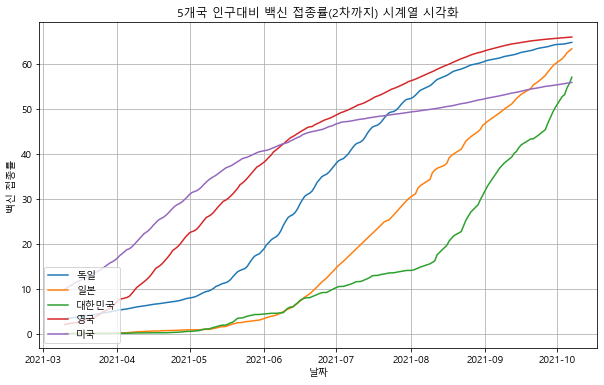

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(vacc['날짜'], vacc['독일_백신접종률'], label="독일")
plt.plot(vacc['날짜'], vacc['일본_백신접종률'], label="일본")
plt.plot(vacc['날짜'], vacc['한국_백신접종률'], label="대한민국")
plt.plot(vacc['날짜'], vacc['영국_백신접종률'], label="영국")
plt.plot(vacc['날짜'], vacc['미국_백신접종률'], label="미국")

plt.grid(True)
plt.legend(loc=3) # 범례 
plt.title("5개국 인구대비 백신 접종률(2차까지) 시계열 시각화")
plt.xlabel("날짜")
plt.ylabel("백신 접종률") 
plt.show()

In [59]:
# 2021년 1월부터 각 5개국의 백신 2차 접종률을 시계열로 데이터시각화 했습니다.
#최근으로 갈수록 인구대비 백신 접종률이 높아 지는 걸 알 수 있으면 각국의 백신 접종률을 표시한 라인이 
# 뚝뚝 끊어지는것은 백신 수요 및 공급 그리고 각 국의 상황에 따라 접종 데이터가 누락 되었거나 없다고 볼 수 있습니다. 
# 대체적으로 국민의 백신 접종률은 높아지고 있는 것을 확인할 수 있습니다.

## 독일의 접종률, 확진자 사망자 비교

In [60]:
vacc_Germany = covid_vacc.loc[covid['location'] == 'Germany']
vacc_Germany["독일_백신접종률"] = (vacc_Germany["2차접종수"] /  83703925 * 100)
vacc_Germany["독일_확진률"] = (vacc_Germany["확진자수"] /  83703925 * 100)
vacc_Germany["독일_사망률"] = (vacc_Germany["사망자주"] /  83703925 * 100)
vacc_Germany['날짜'] = vacc_Germany['날짜'].astype('datetime64[ns]')
vacc_Germany.tail()
# covid_Japan = covid.loc[covid['location'] == 'Japan']

# covid_uk = covid.loc[covid['location'] == 'United Kingdom']
# covid_usa = covid.loc[covid['location'] == 'United States']b

C:\Users\gigic\AppData\Local\Temp/ipykernel_21428/21649642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacc_Germany["독일_백신접종률"] = (vacc_Germany["2차접종수"] /  83703925 * 100)
C:\Users\gigic\AppData\Local\Temp/ipykernel_21428/21649642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacc_Germany["독일_확진률"] = (vacc_Germany["확진자수"] /  83703925 * 100)
C:\Users\gigic\AppData\Local\Temp/ipykernel_21428/21649642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,국가명,날짜,확진자수,사망자주,전체백신_잔여량,1차접종수,2차접종수,독일_백신접종률,독일_확진률,독일_사망률
622,Germany,2021-10-07,4295876.0,94117.0,108825090.0,56920222.0,54155231.0,64.698556,5.132228,0.112440
623,Germany,2021-10-08,4305634.0,94182.0,109001874.0,56976085.0,54241628.0,64.801774,5.143885,0.112518
624,Germany,2021-10-09,4312528.0,94206.0,109038131.0,56990015.0,54261882.0,64.825971,5.152122,0.112547
625,Germany,2021-10-10,4318437.0,94213.0,109053881.0,56996101.0,54270479.0,64.836242,5.159181,0.112555
626,Germany,2021-10-11,4323346.0,94308.0,109141510.0,57022688.0,54312772.0,64.886768,5.165046,0.112669


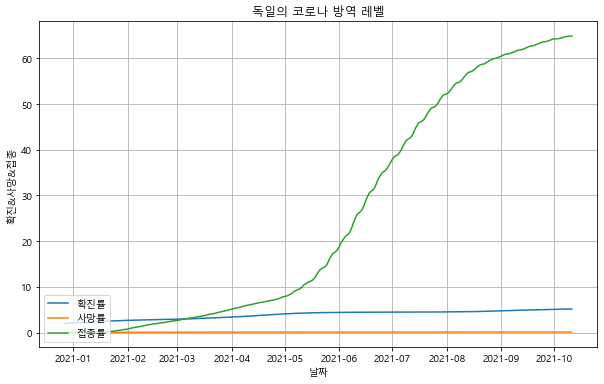

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(vacc_Germany['날짜'], vacc_Germany['독일_확진률'], label="확진률")
plt.plot(vacc_Germany['날짜'], vacc_Germany['독일_사망률'], label="사망률")
plt.plot(vacc_Germany['날짜'], vacc_Germany['독일_백신접종률'], label="접종률")


plt.grid(True)
plt.legend(loc=3) # 범례 
plt.title("독일의 코로나 방역 레벨")
plt.xlabel("날짜")
plt.ylabel("확진&사망&접종") 
plt.show()

In [62]:
# 독일은 첫 스타드가 인구 수의 약 64퍼센트가 백신을 접종하는 것에 완료했습니다. 
# 또한 사망률 및 확진률도 접정률에 비해 어마마하게 낮은 것을 확인 할 수 있습니다.
# 코로나 백신에 부작용도 많다고 들었지만 확실하게 코로나 예방에 있어 효과적이라고 판단이 됩니다.

## 우리나라의 접종률, 확진자 사망자 비교

In [63]:
vacc_Korea = covid_vacc.loc[covid['location'] == 'South Korea']
vacc_Korea["한국_백신접종률"] = (vacc_Korea["2차접종수"] /  51317649 * 100)
vacc_Korea["한국_확진률"] = (vacc_Korea["확진자수"] / 51317649 * 100)
vacc_Korea["한국_사망률"] = (vacc_Korea["사망자주"] /  51317649 * 100)
vacc_Korea['날짜'] = vacc_Korea['날짜'].astype('datetime64[ns]')
vacc_Korea.tail()

C:\Users\gigic\AppData\Local\Temp/ipykernel_21428/2226621804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacc_Korea["한국_백신접종률"] = (vacc_Korea["2차접종수"] /  51317649 * 100)
C:\Users\gigic\AppData\Local\Temp/ipykernel_21428/2226621804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacc_Korea["한국_확진률"] = (vacc_Korea["확진자수"] / 51317649 * 100)
C:\Users\gigic\AppData\Local\Temp/ipykernel_21428/2226621804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,국가명,날짜,확진자수,사망자주,전체백신_잔여량,1차접종수,2차접종수,한국_백신접종률,한국_확진률,한국_사망률
1881,South Korea,2021-10-07,327976.0,2554.0,67633313.0,39865541.0,29224364.0,56.947979,0.639110,0.004977
1882,South Korea,2021-10-08,329925.0,2560.0,68775170.0,39910404.0,30323569.0,59.089942,0.642907,0.004989
1883,South Korea,2021-10-09,331519.0,2575.0,68889445.0,39921191.0,30427485.0,59.292438,0.646014,0.005018
1884,South Korea,2021-10-10,332816.0,2583.0,68909988.0,39923916.0,30445566.0,59.327671,0.648541,0.005033
1885,South Korea,2021-10-11,334163.0,2594.0,69161152.0,40014733.0,30606048.0,59.640394,0.651166,0.005055


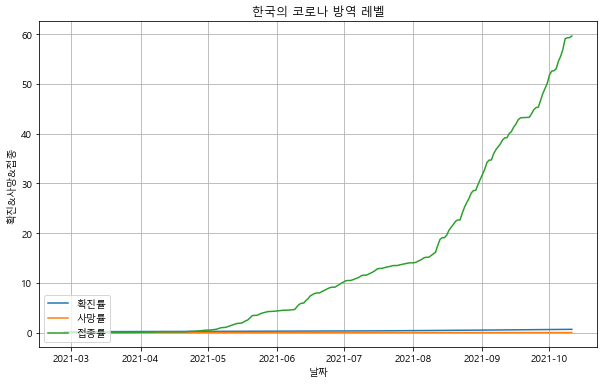

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(vacc_Korea['날짜'], vacc_Korea['한국_확진률'], label="확진률")
plt.plot(vacc_Korea['날짜'], vacc_Korea['한국_사망률'], label="사망률")
plt.plot(vacc_Korea['날짜'], vacc_Korea['한국_백신접종률'], label="접종률")


plt.grid(True)
plt.legend(loc=3) # 범례 
plt.title("한국의 코로나 방역 레벨")
plt.xlabel("날짜")
plt.ylabel("확진&사망&접종") 
plt.show()

## 일본의 접종률, 확진자 사망자 비교

In [65]:
vacc_Japan = covid_vacc.loc[covid['location'] == 'Japan']
vacc_Japan["일본_백신접종률"] = (vacc_Japan["2차접종수"] /  126401064 * 100)
vacc_Japan["일본_확진률"] = (vacc_Japan["확진자수"] / 126401064 * 100)
vacc_Japan["일본_사망률"] = (vacc_Japan["사망자주"] /  126401064 * 100)
vacc_Japan['날짜'] = vacc_Japan['날짜'].astype('datetime64[ns]')
vacc_Japan.tail()

C:\Users\gigic\AppData\Local\Temp/ipykernel_21428/115741380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacc_Japan["일본_백신접종률"] = (vacc_Japan["2차접종수"] /  126401064 * 100)
C:\Users\gigic\AppData\Local\Temp/ipykernel_21428/115741380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacc_Japan["일본_확진률"] = (vacc_Japan["확진자수"] / 126401064 * 100)
C:\Users\gigic\AppData\Local\Temp/ipykernel_21428/115741380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,국가명,날짜,확진자수,사망자주,전체백신_잔여량,1차접종수,2차접종수,일본_백신접종률,일본_확진률,일본_사망률
1249,Japan,2021-10-05,1707511.0,17807.0,170282269.0,91424509.0,78857760.0,62.386943,1.350868,0.014088
1250,Japan,2021-10-06,1708634.0,17833.0,171193251.0,91794890.0,79398361.0,62.814630,1.351756,0.014108
1251,Japan,2021-10-07,1709603.0,17872.0,172127058.0,92174332.0,79952726.0,63.253206,1.352523,0.014139
1254,Japan,2021-10-10,1711756.0,17952.0,174631850.0,93169823.0,81462027.0,64.447264,1.354226,0.014202
1255,Japan,2021-10-11,1712127.0,17972.0,175700765.0,93651522.0,82049243.0,64.911829,1.354519,0.014218


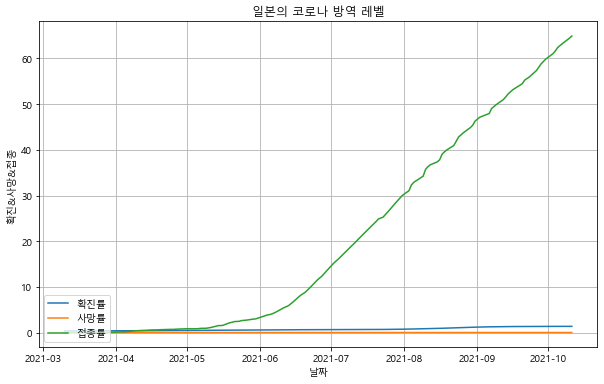

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(vacc_Japan['날짜'], vacc_Japan['일본_확진률'], label="확진률")
plt.plot(vacc_Japan['날짜'], vacc_Japan['일본_사망률'], label="사망률")
plt.plot(vacc_Japan['날짜'], vacc_Japan['일본_백신접종률'], label="접종률")


plt.grid(True)
plt.legend(loc=3) # 범례 
plt.title("일본의 코로나 방역 레벨")
plt.xlabel("날짜")
plt.ylabel("확진&사망&접종") 
plt.show()

In [ ]:
# 우리나라와 일본도 마찬가지로 2021년떄부터 백신 접종률이 급격하게 올라가는 것을 확인 할 수 있었습니다.


C:\Users\gigic\AppData\Local\Temp/ipykernel_21428/2106687680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacc_uk["영국_백신접종률"] = (vacc_uk["2차접종수"] /  68469013 * 100)
C:\Users\gigic\AppData\Local\Temp/ipykernel_21428/2106687680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacc_uk["영국_확진률"] = (vacc_uk["확진자수"] / 68469013 * 100)
C:\Users\gigic\AppData\Local\Temp/ipykernel_21428/2106687680.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

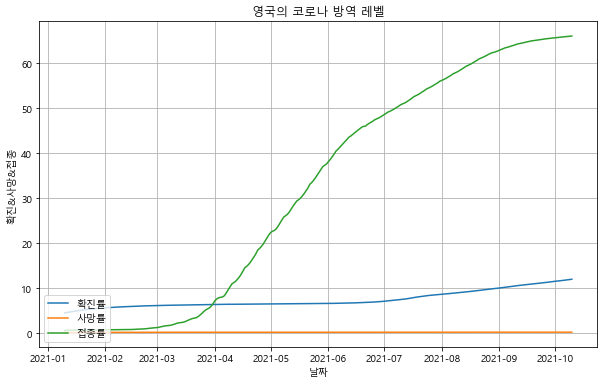

In [67]:
vacc_uk = covid_vacc.loc[covid['location'] == 'United Kingdom']
vacc_uk["영국_백신접종률"] = (vacc_uk["2차접종수"] /  68469013 * 100)
vacc_uk["영국_확진률"] = (vacc_uk["확진자수"] / 68469013 * 100)
vacc_uk["영국_사망률"] = (vacc_uk["사망자주"] /  68469013 * 100)
vacc_uk['날짜'] = vacc_uk['날짜'].astype('datetime64[ns]')

plt.figure(figsize=(10, 6))
plt.plot(vacc_uk['날짜'], vacc_uk['영국_확진률'], label="확진률")
plt.plot(vacc_uk['날짜'], vacc_uk['영국_사망률'], label="사망률")
plt.plot(vacc_uk['날짜'], vacc_uk['영국_백신접종률'], label="접종률")


plt.grid(True)
plt.legend(loc=3) # 범례 
plt.title("영국의 코로나 방역 레벨")
plt.xlabel("날짜")
plt.ylabel("확진&사망&접종") 
plt.show()

C:\Users\gigic\AppData\Local\Temp/ipykernel_21428/2557749027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacc_us["미국_백신접종률"] = (vacc_us["2차접종수"] /  334483145 * 100)
C:\Users\gigic\AppData\Local\Temp/ipykernel_21428/2557749027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacc_us["미국_확진률"] = (vacc_us["확진자수"] / 334483145 * 100)
C:\Users\gigic\AppData\Local\Temp/ipykernel_21428/2557749027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

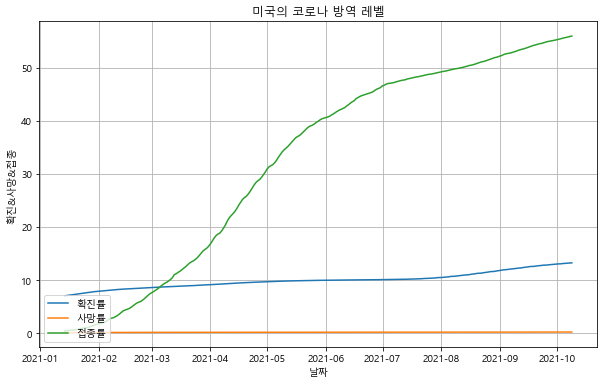

In [69]:
vacc_us = covid_vacc.loc[covid['location'] == 'United States']
vacc_us["미국_백신접종률"] = (vacc_us["2차접종수"] /  334483145 * 100)
vacc_us["미국_확진률"] = (vacc_us["확진자수"] / 334483145 * 100)
vacc_us["미국_사망률"] = (vacc_us["사망자주"] /  334483145 * 100)
vacc_us['날짜'] = vacc_us['날짜'].astype('datetime64[ns]')

plt.figure(figsize=(10, 6))
plt.plot(vacc_us['날짜'], vacc_us['미국_확진률'], label="확진률")
plt.plot(vacc_us['날짜'], vacc_us['미국_사망률'], label="사망률")
plt.plot(vacc_us['날짜'], vacc_us['미국_백신접종률'], label="접종률")


plt.grid(True)
plt.legend(loc=3) # 범례 
plt.title("미국의 코로나 방역 레벨")
plt.xlabel("날짜")
plt.ylabel("확진&사망&접종") 
plt.show()


# 문제7 각 나라별 의료수준 수치 대비 코로나19  

### LPI 지수를 사용해서 의료레벨 수치 확인
### 레가툼 세계 번영 지수(Legatum Prosperity Index)
#### 영국 싱크탱크 레가툼(Legatum)이 2007년부터 매년 조사, 발표하는 세계 번영 지수다. 경제, 기업 환경, 국가 경영, 교육, 보건, 안전 · 


#### 안보, 개인의 자유, 사회적 자본, 자연 환경 등 9가지 지표를 기준으로 점수를 매기고 각국에 순위를 매긴다.




In [44]:
HealthCare = pd.read_csv(
    "./data/GlobalHealthcare.csv",
    encoding="utf-8")


HealthCare.head(30)

,country,legatumRank2020,legatumRank2019,ceoworldRank,pop2021
0,Denmark,1,2,3.0,5813.298
1,Norway,2,1,15.0,5465.630
2,Switzerland,3,3,18.0,8715.494
3,Sweden,4,4,28.0,10160.169
4,Finland,5,5,12.0,5548.360
5,Netherlands,6,6,11.0,17173.099
6,New Zealand,7,7,16.0,4860.643
7,Germany,8,8,17.0,83900.473
8,Luxembourg,9,9,NaN,634.814
9,Austria,10,12,4.0,9043.070


In [45]:
HealthCare.drop("legatumRank2019", axis=1, inplace=True)
HealthCare.drop("ceoworldRank", axis=1, inplace=True)
HealthCare.drop("pop2021", axis=1, inplace=True)



In [46]:
df = HealthCare.head(30)
df

,country,legatumRank2020
0,Denmark,1
1,Norway,2
2,Switzerland,3
3,Sweden,4
4,Finland,5
5,Netherlands,6
6,New Zealand,7
7,Germany,8
8,Luxembourg,9
9,Austria,10
